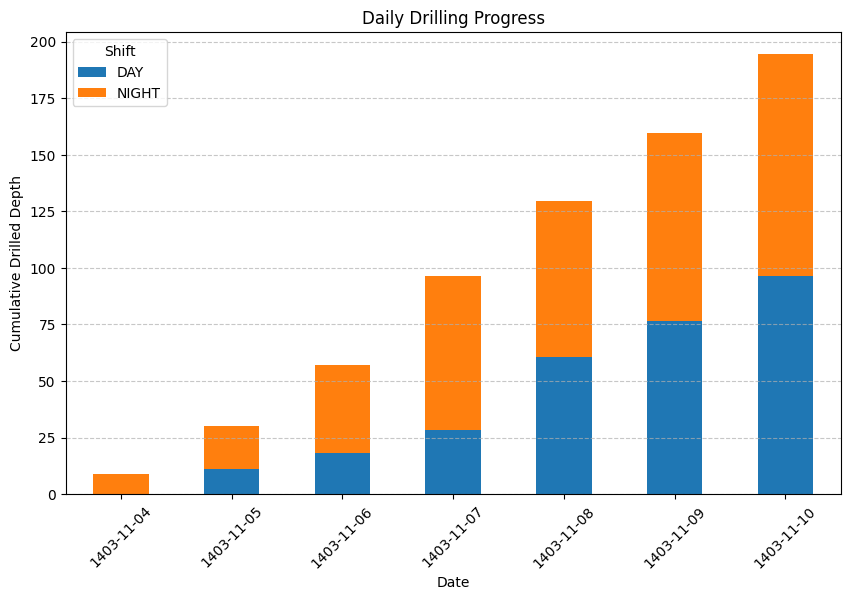

In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
with open("test.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert date to datetime format
from persiantools.jdatetime import JalaliDate

# Convert Persian (Jalali) dates to Gregorian
import jdatetime

# Convert Persian (Jalali) dates to Gregorian
df["Gregorian Date"] = df["تاریخ"].apply(lambda x: jdatetime.date.fromisoformat(x).togregorian())
df["Gregorian Date"] = pd.to_datetime(df["Gregorian Date"])  # Now, it works!


# Calculate the depth drilled per shift
df["عمق حفاری"] = df["عمق پایان"] - df["عمق شروع"]

# Group by date and shift
progress_df = df.pivot(index="تاریخ", columns="شیفت", values="عمق حفاری").fillna(0)

# Compute cumulative progress
daily_progress = progress_df.cumsum()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
daily_progress.plot(kind="bar", stacked=True, ax=ax, color=["#1f77b4", "#ff7f0e"])
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Drilled Depth")
ax.set_title("Daily Drilling Progress")
plt.xticks(rotation=45)
plt.legend(title="Shift")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


NameError: name 'aq' is not defined

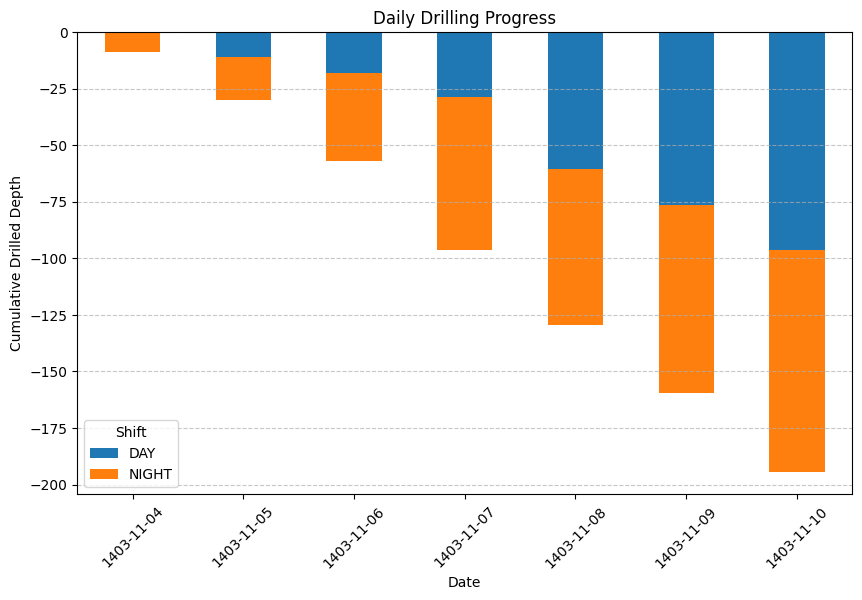

In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
with open("test.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert date to datetime format
import jdatetime

# Convert Persian (Jalali) dates to Gregorian
df["Gregorian Date"] = df["تاریخ"].apply(lambda x: jdatetime.date.fromisoformat(x).togregorian())
df["Gregorian Date"] = pd.to_datetime(df["Gregorian Date"])  # Now, it works!

# Calculate the depth drilled per shift
df["عمق حفاری"] = df["عمق پایان"] - df["عمق شروع"]

# Group by date and shift
progress_df = df.pivot(index="تاریخ", columns="شیفت", values="عمق حفاری").fillna(0)

# Compute cumulative progress
daily_progress = progress_df.cumsum()

# Flip values to make bars go downward
daily_progress = -daily_progress

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
daily_progress.plot(kind="bar", stacked=True, ax=ax, color=["#1f77b4", "#ff7f0e"])
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Drilled Depth")
ax.set_title("Daily Drilling Progress")
plt.xticks(rotation=45)
plt.legend(title="Shift")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Invert y-axis to simulate drilling
aq.set_ylim(ax.get_ylim()[::-1])

plt.show()

NameError: name 'aq' is not defined

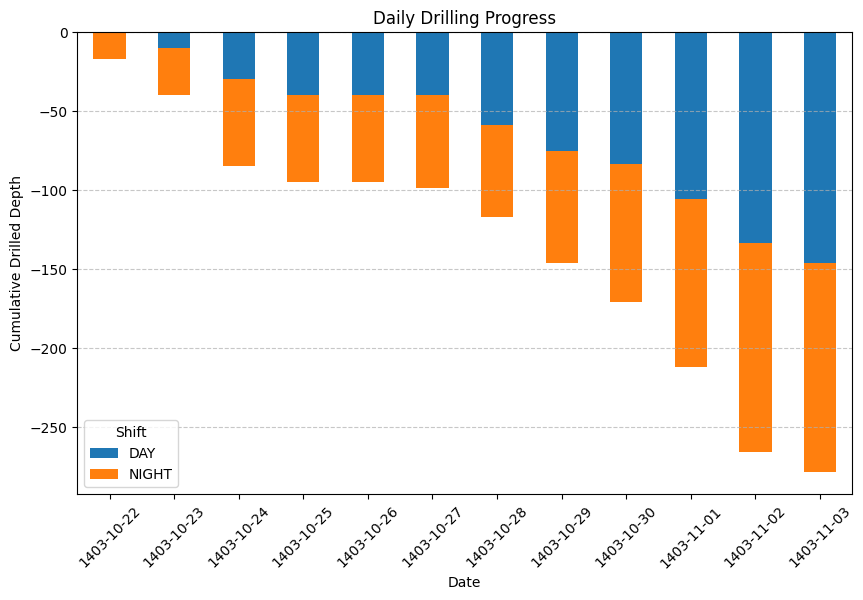

In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
with open("test2.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert date to datetime format
import jdatetime

# Convert Persian (Jalali) dates to Gregorian
df["Gregorian Date"] = df["تاریخ"].apply(lambda x: jdatetime.date.fromisoformat(x).togregorian())
df["Gregorian Date"] = pd.to_datetime(df["Gregorian Date"])  # Now, it works!

# Calculate the depth drilled per shift
df["عمق حفاری"] = df["عمق پایان"] - df["عمق شروع"]

# Group by date and shift
progress_df = df.pivot(index="تاریخ", columns="شیفت", values="عمق حفاری").fillna(0)

# Compute cumulative progress
daily_progress = progress_df.cumsum()

# Flip values to make bars go downward
daily_progress = -daily_progress

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
daily_progress.plot(kind="bar", stacked=True, ax=ax, color=["#1f77b4", "#ff7f0e"])
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Drilled Depth")
ax.set_title("Daily Drilling Progress")
plt.xticks(rotation=45)
plt.legend(title="Shift")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Invert y-axis to simulate drilling
aq.set_ylim(ax.get_ylim()[::-1])

plt.show()

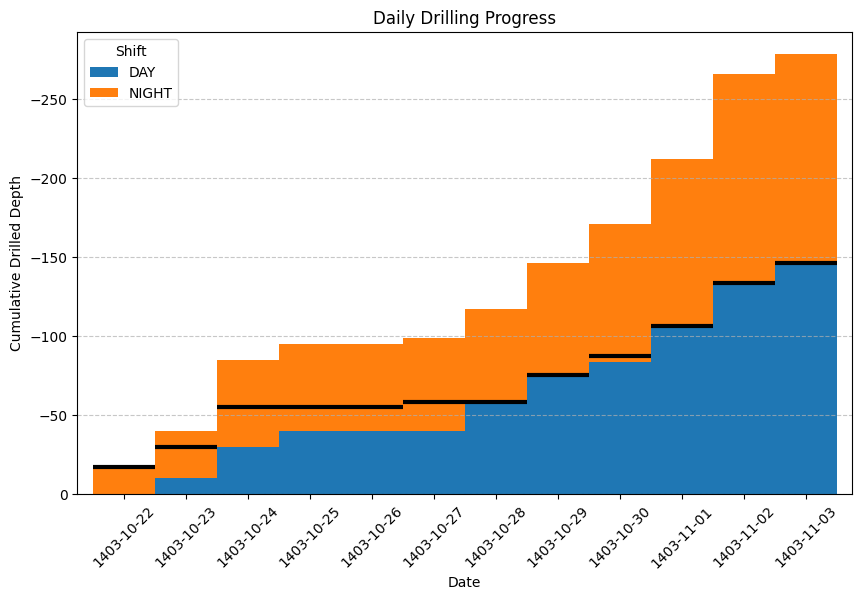

In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import jdatetime

# Load the JSON file
with open("test2.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert Persian (Jalali) dates to Gregorian
df["Gregorian Date"] = df["تاریخ"].apply(lambda x: jdatetime.date.fromisoformat(x).togregorian())
df["Gregorian Date"] = pd.to_datetime(df["Gregorian Date"])  # Now, it works!

# Calculate the depth drilled per shift
df["عمق حفاری"] = df["عمق پایان"] - df["عمق شروع"]

# Group by date and shift
progress_df = df.pivot(index="تاریخ", columns="شیفت", values="عمق حفاری").fillna(0)

# Compute cumulative progress
daily_progress = progress_df.cumsum()

# Flip values to make bars go downward (simulate drilling)
daily_progress = -daily_progress

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
# Use width=1.0 to remove spaces between the bars
daily_progress.plot(kind="bar", stacked=True, ax=ax, color=["#1f77b4", "#ff7f0e"], width=1.0)
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Drilled Depth")
ax.set_title("Daily Drilling Progress")
plt.xticks(rotation=45)
plt.legend(title="Shift")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Invert y-axis to simulate drilling (depth increasing downward)
ax.set_ylim(ax.get_ylim()[::-1])

# Compute the drilling front for each day:
# Since our values are negative (and the bars extend downward),
# the 'drilling front' is the minimum value (i.e. the bottom edge of the stacked bar)
top_boundaries = daily_progress.min(axis=1)

# Get x positions of bars. DataFrame.plot() places bars at integer positions.
bar_positions = range(len(daily_progress.index))
bar_width = 1.0

# Draw a thick horizontal line on the top (drilling front) of each bar.
for i, y_top in enumerate(top_boundaries):
    ax.hlines(y=y_top, xmin=i - bar_width/2, xmax=i + bar_width/2, colors='black', linewidth=3)

plt.show()


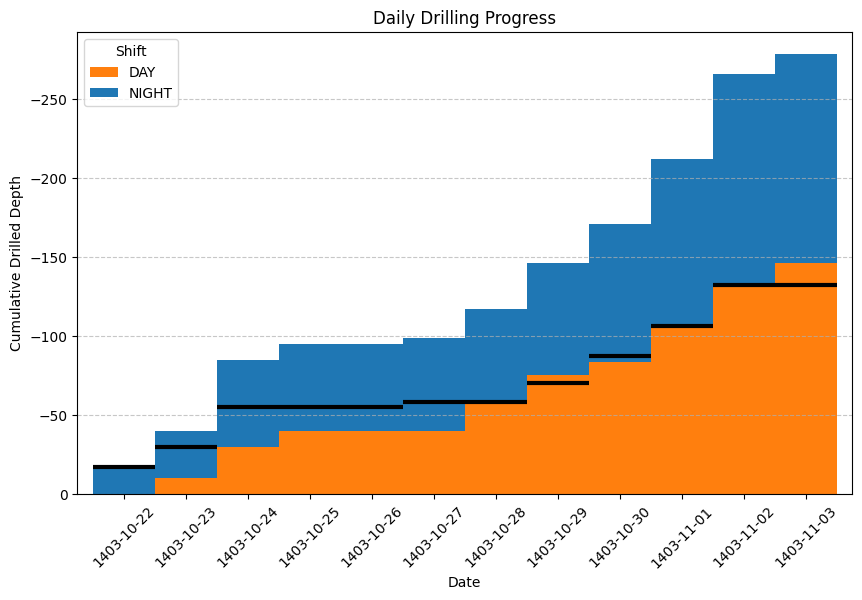

In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import jdatetime

# Load the JSON file
with open("test2.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert Persian (Jalali) dates to Gregorian
df["Gregorian Date"] = df["تاریخ"].apply(lambda x: jdatetime.date.fromisoformat(x).togregorian())
df["Gregorian Date"] = pd.to_datetime(df["Gregorian Date"])

# Calculate the depth drilled per shift
df["عمق حفاری"] = df["عمق پایان"] - df["عمق شروع"]

# Group by date and shift
progress_df = df.pivot(index="تاریخ", columns="شیفت", values="عمق حفاری").fillna(0)

# Reorder columns so that the bottom (DAY) is drawn first and NIGHT is drawn on top.
# This ensures the top of each bar (drilling front) is the NIGHT shift.
if set(progress_df.columns) >= {"DAY", "NIGHT"}:
    progress_df = progress_df[["DAY", "NIGHT"]]

# Compute cumulative progress
daily_progress = progress_df.cumsum()

# Flip values to make bars go downward (simulate drilling)
daily_progress = -daily_progress

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
# Set bar width to 1.0 to remove spacing between bars
daily_progress.plot(kind="bar", stacked=True, ax=ax, 
                    color=["#ff7f0e", "#1f77b4"], width=1.0)  
# In this color scheme: bottom (DAY) is orange, top (NIGHT) is blue.
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Drilled Depth")
ax.set_title("Daily Drilling Progress")
plt.xticks(rotation=45)
plt.legend(title="Shift")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Invert y-axis to simulate drilling (depth increasing downward)
ax.set_ylim(ax.get_ylim()[::-1])

# Add a thick border along the top edge of each bar (the NIGHT portion)
# The top boundary of each bar is given by the cumulative value for the NIGHT column.
top_boundaries = daily_progress["NIGHT"]
bar_positions = range(len(daily_progress.index))
bar_width = 1.0

for i, y_top in enumerate(top_boundaries):
    ax.hlines(y=y_top, xmin=i - bar_width/2, xmax=i + bar_width/2, 
              colors='black', linewidth=3)

plt.show()
